In [1]:
# Company Data Exercise

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
import re

In [3]:
data = pd.read_csv("Company_Data.csv")
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15


In [4]:
print("Dataset Length:: ",len(data))
print("Dataset Shape:: ",data.shape)

Dataset Length::  400
Dataset Shape::  (400, 11)


In [5]:
label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban']) 

label_encoder = preprocessing.LabelEncoder()
data['US']= label_encoder.fit_transform(data['US']) 

label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

label_encoder = preprocessing.LabelEncoder()
data['Sales']= label_encoder.fit_transform(data['Sales']) 

In [6]:
data['Sales'] = data.Sales.astype('category')

In [7]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,255
1,111,48,16,260,83,1,65,10,1,1,297
2,113,35,10,269,80,2,59,12,1,1,267
3,117,100,4,466,97,2,55,14,1,1,158
4,141,64,3,340,128,0,38,13,1,0,37
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,320
396,139,23,3,37,120,2,55,11,0,1,114
397,162,26,12,368,159,2,40,18,1,1,159
398,100,79,7,284,95,0,50,12,1,1,106


In [8]:
#Separting the Target Variable
X = data.values [:, 0:9]
Y = data.values [:, 10]

In [9]:
# Splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 

In [10]:
#Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier (criterion = "entropy", random_state = 100,
max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [11]:
#Function to perform training with Entropy
y_pred_en = clf_entropy.predict(X_test)
print(y_pred_en)

[ 58 240   4 223  58 223   4   4 168 168 128  58 240 243 240 223 243 223
 240  58 240  34  58 223 128  34 223 223 128 243 240 128 168 128 168 168
 240 168 223   4 128   4 168 240  58 168 168  34 168  58 240 128 168  58
 240 240 128  58  58 223 243  34  58  34 128  34   4 243 223 168  58 223
 223 223 243   4 223  34 243 243 243 223 168 128 243 168   4  58  34   4
 128 243 240 243  58  58 240 223 168   4 128 168 223 168 128 168  34  58
 223  34 128 240  34 128 240 168 223 128 223 128]


In [12]:
print("Accuracy is", accuracy_score(y_test,y_pred_en)*100)

Accuracy is 0.8333333333333334


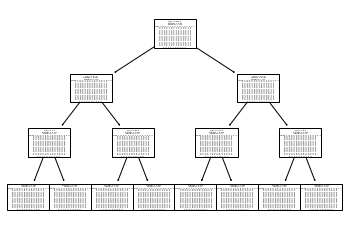

In [14]:
#PLot the decision tree
tree.plot_tree(clf_entropy);


In [152]:
# Fraud Check Exercise

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
import re

In [16]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital Status,City Population,Work Experience,Urban,TaxableIncome
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [17]:
data.isnull().sum()

Undergrad          0
Marital Status     0
City Population    0
Work Experience    0
Urban              0
TaxableIncome      0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()
data['Marital Status']= label_encoder.fit_transform(data['Marital Status']) 

label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban']) 

label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

label_encoder = preprocessing.LabelEncoder()
data['TaxableIncome']= label_encoder.fit_transform(data['TaxableIncome']) 

In [19]:
data

,Undergrad,Marital Status,City Population,Work Experience,Urban,TaxableIncome
0,0,2,50047,10,1,387
1,1,0,134075,18,1,163
2,0,1,160205,30,1,186
3,1,2,193264,15,1,272
4,0,1,27533,28,0,468
...,...,...,...,...,...,...
595,1,0,39492,7,1,436
596,1,0,55369,2,1,395
597,0,0,154058,0,1,251
598,1,1,180083,17,0,587


In [20]:
X=data.iloc[:,0:5]
y=data['TaxableIncome']

In [22]:
data['TaxableIncome'].unique() 

array([387, 163, 186, 272, 468, 158, 483, 350, 485, 581, 121, 336,  13,
       341, 359, 394,  89, 206, 578,  11, 516,  29, 454, 537, 192, 132,
       300, 513,   5, 552, 427, 358, 572, 477,  21, 130,   2, 382,  33,
       429, 277, 265, 568, 398, 162, 470, 135, 236,  42, 242, 462, 209,
       577,  72, 476,  62, 171, 448,   8, 366, 556, 102, 534, 280, 345,
       319, 226, 340,   1, 598, 522, 554, 216, 217, 144, 337, 376, 133,
       424,   3, 240, 175, 371, 510, 391, 110, 203,  27, 505,  99, 444,
       597, 500,  34,   4, 218,  78, 460,  77, 287, 543, 173, 148, 520,
       220, 302,  58, 247, 284, 392,  88, 446, 566, 526,  73, 456, 229,
       297, 123, 573, 285,  65,  69,  98, 403, 509,  40, 433, 580, 292,
       548, 307, 250, 160, 176,  20, 293,  79, 491, 270, 109, 312, 328,
       100, 458, 166, 489, 354, 232, 210, 463, 375,  75,  53,  91, 323,
       201, 261, 111, 346, 511, 549, 308, 103, 262, 529, 266, 214,  54,
       439, 586,  67,  25, 493, 238, 200, 198, 584, 508, 116, 41

In [23]:
data.TaxableIncome.value_counts() 

331    2
0      1
403    1
396    1
397    1
      ..
200    1
201    1
202    1
203    1
598    1
Name: TaxableIncome, Length: 599, dtype: int64

In [24]:
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital Status',
 'City Population',
 'Work Experience',
 'Urban',
 'TaxableIncome']

In [26]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 50)

In [27]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [30]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=3)

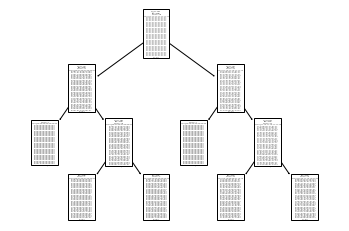

In [31]:
#PLot the decision tree
tree.plot_tree(model);


In [33]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

1      46
0      32
3      25
19     16
579     1
dtype: int64

In [34]:
preds 

array([  3,   3,   3,   0,   3,   3,   3,   1,   0,  19,   1,  19,   1,
         1,   0,   1,   1,   1,   1,   3,   1,   0,  19,   1,   1,   3,
        19,   1,   1,   3,   3,   3,   0,   1,   0,   0,   0,   3,   1,
         0,   1,   1,   0,   1,   1,   1,   3,   1,   1,   0,   0,  19,
        19,   1,   0,   0,   0,   1, 579,   1,   1,   1,   1,   3,   1,
         3,   1,   1,   0,   0,   3,   1,   0,   3,   1,   0,   1,  19,
         0,   0,   1,  19,   0,   0,   1,  19,   1,   3,   3,   3,   0,
         0,   1,  19,   3,   1,   1,   3,   3,  19,   3,  19,   1,   0,
         0,   0,   0,   0,   1,   1,  19,   0,   3,  19,   1,  19,   0,
         1,  19,   1], dtype=int64)

In [35]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,3,19,579
TaxableIncome,,,,,
15,0,0,0,1,0
16,1,0,0,0,0
23,0,1,0,0,0
25,1,0,0,0,0
26,0,1,0,0,0
...,...,...,...,...,...
584,1,0,0,0,0
586,0,0,1,0,0
591,0,1,0,0,0


In [38]:
# Accuracy 
np.mean(preds==y_test)

0.0

In [39]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [41]:
array = data.values
X = array[:,0:4]
y = array[:,5] 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [46]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [47]:
#Find the accuracy
model.score(X_test,y_test) 

-1.0487560846779678

In [ ]:
# Fraud Check Exercise - 2

In [49]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# load dataset
data = pd.read_csv("Fraud_check.csv")

In [50]:
data.head()

,Undergrad,Marital Status,City Population,Work Experience,Urban,TaxableIncome
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()
data['Marital Status']= label_encoder.fit_transform(data['Marital Status']) 

label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban']) 

label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

label_encoder = preprocessing.LabelEncoder()
data['TaxableIncome']= label_encoder.fit_transform(data['TaxableIncome']) 

In [66]:
#split dataset in features and target variable

X = data.iloc[:,0:5] # Features
y = data.TaxableIncome # Target variable

In [67]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [68]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [69]:
("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.0)

In [ ]:
#Fraud CHeck EXercise - 3

In [71]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Fraud_check.csv")

In [72]:
df.head()

,Undergrad,Marital Status,City Population,Work Experience,Urban,TaxableIncome
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [74]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital Status','Urban'], drop_first=True)

In [76]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["TaxableIncome"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [77]:
# taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [79]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)
df.tail(10)

,City Population,Work Experience,TaxableIncome,Undergrad_YES,Marital Status_Married,Marital Status_Single,Urban_YES,TaxInc_Good
590,85195,14,43018,0,1,0,1,1
591,132859,18,27394,1,0,1,1,0
592,75143,16,68152,1,0,1,0,1
593,131963,10,84775,0,0,0,1,1
594,97526,9,47364,0,1,0,1,1
595,39492,7,76340,1,0,0,1,1
596,55369,2,69967,1,0,0,1,1
597,154058,0,47334,0,0,0,1,1
598,180083,17,98592,1,1,0,0,1
599,158137,16,96519,0,0,0,0,1


In [80]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [82]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,0:])
df_norm.tail(10)

,City Population,Work Experience,TaxableIncome,Undergrad_YES,Marital Status_Married,Marital Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.368405,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,0.194061,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,0.648869,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.834360,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.416901,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,0.740236,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,0.669122,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.416566,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,0.988540,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.965408,0.0,0.0,0.0,0.0,1.0


In [83]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
#Choosing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [96]:
forest = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [97]:
print('Train accuracy: {}'.format(forest.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest.score(Xtest, ytest)))

Train accuracy: 1.0
Test accuracy: 1.0


In [107]:
# Creating new model testing with new parameters
forest_new = RandomForestClassifier(n_estimators=50,max_depth=5,min_samples_split=30,criterion='entropy')  # n_estimators is the number of decision trees
forest_new.fit(Xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=30,
                       n_estimators=50)

In [108]:
print('Train accuracy: {}'.format(forest_new.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(forest_new.score(Xtest, ytest)))

Train accuracy: 1.0
Test accuracy: 1.0


In [110]:
# Fraud Check EXercise - 4

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
import re

In [112]:
data = pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital Status,City Population,Work Experience,Urban,TaxableIncome
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [113]:
data.isnull().sum()

Undergrad          0
Marital Status     0
City Population    0
Work Experience    0
Urban              0
TaxableIncome      0
dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder

label_encoder = preprocessing.LabelEncoder()
data['Marital Status']= label_encoder.fit_transform(data['Marital Status']) 

label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban']) 

label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 

label_encoder = preprocessing.LabelEncoder()
data['TaxableIncome']= label_encoder.fit_transform(data['TaxableIncome']) 

In [115]:
data

,Undergrad,Marital Status,City Population,Work Experience,Urban,TaxableIncome
0,0,2,50047,10,1,387
1,1,0,134075,18,1,163
2,0,1,160205,30,1,186
3,1,2,193264,15,1,272
4,0,1,27533,28,0,468
...,...,...,...,...,...,...
595,1,0,39492,7,1,436
596,1,0,55369,2,1,395
597,0,0,154058,0,1,251
598,1,1,180083,17,0,587


In [116]:
print("Dataset Length:: ",len(data))
print("Dataset Shape:: ",data.shape)

Dataset Length::  600
Dataset Shape::  (600, 6)


In [117]:
X=data.iloc[:,0:5]
Y=data['TaxableIncome']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100) 

In [119]:
#Function to perform training with Entropy
clf_gini = DecisionTreeClassifier (criterion = "gini", random_state = 40,
max_depth = 3, min_samples_leaf = 5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=40)

In [120]:
#Function to perform training with Entropy
y_pred_en = clf_gini.predict(X_test)
print(y_pred_en)

[  0  45   3   8   3  41 331   0 331   0   0   8  45   8  45   0   0   0
 331   8  45   8   0 331  45   3   0   8   8  12 331   0   8   0   0   8
   8   8   0  45   0   0   0   0  29   0   0   8   0  45   8 331   8 331
   0   8  45   8   0  12   8  45 331   8   0   8   0   8   3   0  45   0
   8   0   0   8   0   3   0 331  12   3  45 331  45  45   8   0   3   8
   3 331  45   0   8 331   8   8   3   0   8  45   0  45   8   0   0   8
   8  41   0   0   3   0   8   8   8   8 331   3]


In [121]:
print("Accuracy is", accuracy_score(y_test,y_pred_en)*100)

Accuracy is 0.0


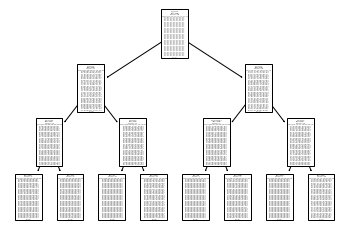

In [122]:
#PLot the decision tree
tree.plot_tree(clf_gini);
